In [1]:
import sys
path_utils = 'decoding_toolbox_py/helper_funcs' 
sys.path.append(path_utils)

In [2]:
import os, glob, platform
import numpy as np
import numpy.matlib
import pickle
import pandas as pd
import pathlib
import matplotlib
import matplotlib.pyplot as plt

import mne
mne.__version__


'1.4.0'

In [4]:
path = 'Cond_CJ_EEG'

subjs_list = ['s01'
              , 's02'
              , 's03'
              ,'s04','s05','s07','s08','s09','s10','s11','s12','s13','s14', 's15', 's16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27' 
              ]

In [7]:
all_epochs = []
all_rawdata = [None] * np.size(subjs_list)
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
    subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
    all_rawdata[isubj] =  subj_data
    all_epochs.append(epoch)
    epoch.metadata

In [10]:
nreps = [0, 1, 2];
all_evoks = []

for irep in nreps:
    nreplist = []
    for isubj, subject_id in enumerate(subjs_list):
        epoch = all_epochs[isubj]
        mdata = epoch.metadata.copy()
        mdata.reset_index(inplace = True)
        sel_epos = mdata[mdata.nrep == irep].index;  
        nreplist.append(epoch[sel_epos].average());
        #all_evoks[irep] = epoch[sel_epos].average();
    all_evoks.append(nreplist)   

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [11]:
nreps = [0, 1, 2];
rep_gvaverage = [None] * 3
for irep in nreps:
   rep_gvaverage[irep] = mne.grand_average(all_evoks[irep])

Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pi

In [12]:
epoch.metadata

,index,subj,nblock,ntrial,nrep,trial_type,cond-1,cond,rDV,DV,...,d5,d6,o1,o2,o3,o4,o5,o6,confi-1,conf_lvl-1
883,0,s27,0,0,0,repeat,0,1,0.920718,0.33333,...,0.846716,0.305306,2.034000,2.404000,1.195000,1.187000,2.296000,2.629000,0.00,L
896,1,s27,0,0,1,repeat,1,1,0.920718,0.33333,...,0.846716,0.305306,2.034000,2.404000,1.195000,1.187000,2.296000,2.629000,-0.70,H
909,2,s27,0,0,2,repeat,1,1,0.920718,0.33333,...,0.846716,0.305306,2.034000,2.404000,1.195000,1.187000,2.296000,2.629000,-0.65,H
922,3,s27,0,1,0,nonrepeat,1,0,0.368880,-0.23333,...,0.167797,-0.648586,1.237000,1.836000,1.557000,0.948000,2.683000,0.138000,-0.50,H
935,4,s27,0,1,1,nonrepeat,0,0,0.368880,-0.23333,...,0.167797,-0.648586,1.237000,1.836000,1.557000,0.948000,2.683000,0.138000,-0.70,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,259,s27,3,20,1,nonrepeat,0,0,0.273896,-0.01000,...,-0.226389,0.950084,1.170000,0.288000,1.838000,1.264000,1.267000,0.805000,-0.95,L
4266,260,s27,3,20,2,nonrepeat,0,0,0.797494,-0.01000,...,-0.226389,0.950084,2.740796,1.858796,0.267204,2.834796,2.837796,2.375796,-0.95,L
4279,261,s27,3,21,0,repeat,0,1,1.061320,0.01000,...,0.529915,-0.275291,3.127000,2.586000,0.337000,2.536000,0.970000,2.857000,-1.00,L
4292,262,s27,3,21,1,repeat,1,1,1.061320,0.01000,...,0.529915,-0.275291,3.127000,2.586000,0.337000,2.536000,0.970000,2.857000,-0.95,L


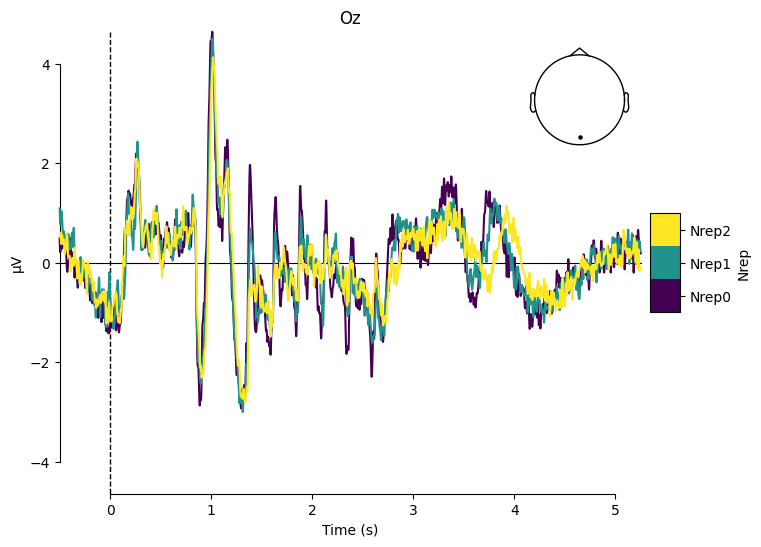

[<Figure size 800x600 with 3 Axes>]

In [13]:
mne.viz.plot_compare_evokeds(dict(Nrep0=rep_gvaverage[0], Nrep1=rep_gvaverage[1],Nrep2=rep_gvaverage[2]), picks = ['Oz'], cmap=('Nrep', 'viridis'))
